In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", figsize=(12.0, 8.0))
import seaborn as sns
sns.set(color_codes=True)

In [2]:
conn = sqlite3.connect("salaries.db")
columns = ["File_Date",
           "SubAgency", 
           "Age_Range",
           "Education_Level",
           "Pay_Plan",
           "Grade",
           "LOS_Level",
           "Occupation",
           "PATCO",
           "Adjusted_Basic_Pay",
           "Supervisory_Status",
           "TOA",
           "Work_Schedule",
           "NSFTP_Indicator"]

In [4]:
num_employees = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    COUNT(*) AS Number_Employees 
FROM 
    (SELECT
        File_Date,
        REPLACE(Occupation, '1169', '0512') AS Occupation
     FROM 
         data) sub
WHERE
    File_Date LIKE '%03'
    AND Occupation IN ('0512')
GROUP BY
    File_Date,
    Occupation
;""", conn)
num_employees["Date"] = pd.to_datetime(num_employees["Date"], format="%Y%m")
num_employees["Occupation"] = num_employees["Occupation"].map({"0512": "Internal Revenue Service"})

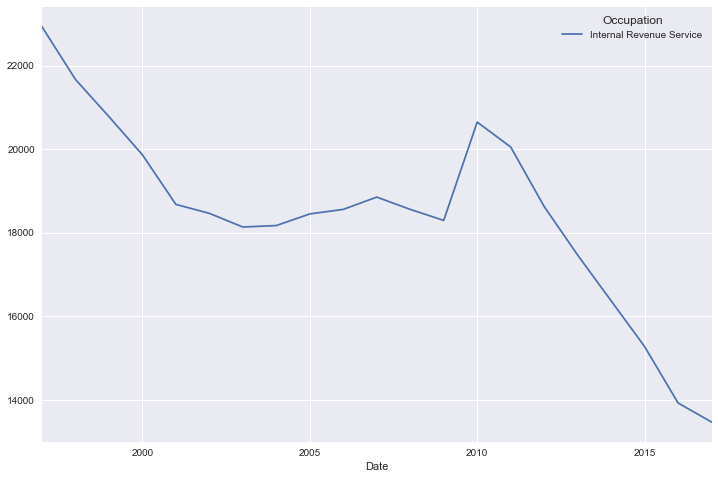

In [5]:
num_employees[num_employees["Date"] > "1997-01-01"].to_csv("num_employees.csv", index=False)
num_employees[num_employees["Date"] > "1997-01-01"]\
    .pivot(index="Date", columns="Occupation", values="Number_Employees").plot()

In [6]:
total_salaries = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    REPLACE(Occupation, "1169", "0512") AS Occupation,
    SUM(Adjusted_Basic_Pay) AS Total_Budget 
FROM 
    (SELECT
        File_Date,
        REPLACE(Occupation, '1169', '0512') AS Occupation,
        Adjusted_Basic_Pay
     FROM 
         data) sub
WHERE
    File_Date LIKE '%03'
    AND Occupation IN ('0512')
GROUP BY
    File_Date, 
    Occupation
;""", conn)
total_salaries["Date"] = pd.to_datetime(total_salaries["Date"], format="%Y%m")
total_salaries["Occupation"] = total_salaries["Occupation"].map({"0512": "Internal Revenue Service"})

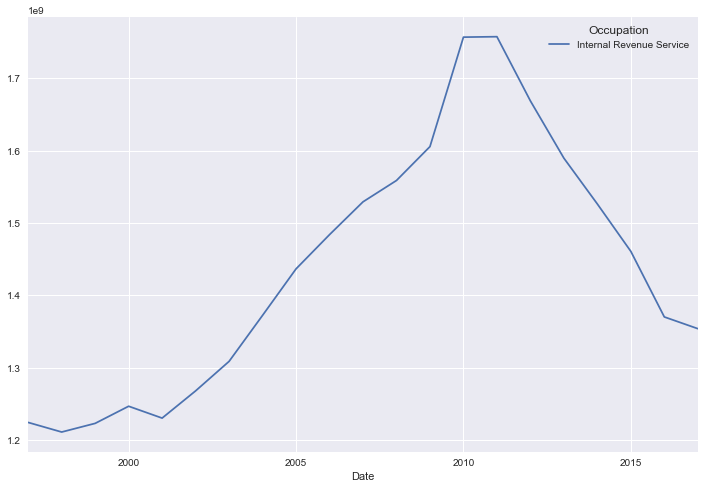

In [7]:
total_salaries[total_salaries["Date"] > "1997-01-01"].to_csv("total_salaries.csv", index=False)
total_salaries[total_salaries["Date"] > "1997-01-01"]\
    .pivot(index="Date", columns="Occupation", values="Total_Budget").plot()

In [8]:
average_salaries = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    AVG(Adjusted_Basic_Pay) AS Average_Salary
FROM 
    (SELECT
        File_Date,
        REPLACE(Occupation, '1169', '0512') AS Occupation,
        Adjusted_Basic_Pay
     FROM 
         data) sub
WHERE
    File_Date LIKE '%03'
    AND Occupation IN ('0512')
GROUP BY
    File_Date, 
    Occupation
;""", conn)
average_salaries["Date"] = pd.to_datetime(average_salaries["Date"], format="%Y%m")
average_salaries["Occupation"] = average_salaries["Occupation"].map({"0512": "Internal Revenue Service"})

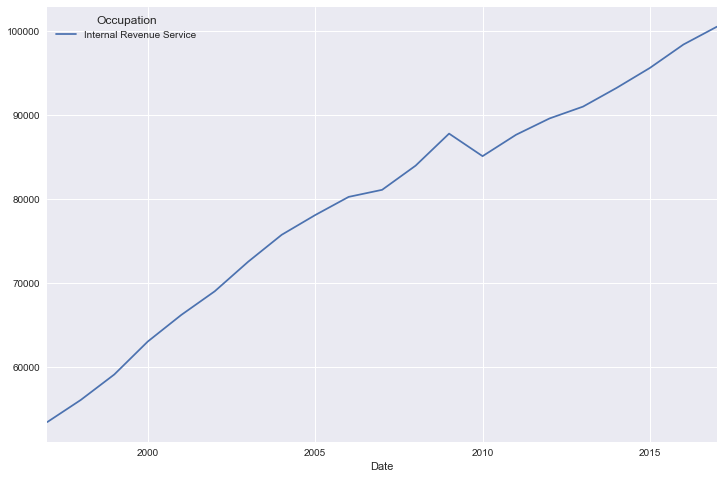

In [9]:
average_salaries[average_salaries["Date"] > "1997-01-01"].to_csv("average_salaries.csv", index=False)
average_salaries[average_salaries["Date"] > "1997-01-01"]\
.pivot(index="Date", columns="Occupation", values="Average_Salary").plot()

In [10]:
average_ages = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    Age_Range,
    COUNT(*) AS Number_Employees
FROM 
    (SELECT
        File_Date,
        REPLACE(Occupation, '1169', '0512') AS Occupation,
        Age_Range
     FROM 
         data) sub
WHERE
    File_Date LIKE '%03'
    AND Occupation IN ('0512')
GROUP BY
    File_Date, 
    Occupation,
    Age_Range
;""", conn)
average_ages["Date"] = pd.to_datetime(average_ages["Date"], format="%Y%m")
average_ages["Occupation"] = average_ages["Occupation"].map({"0512": "Internal Revenue Service"})
average_ages["Age_Range"] = average_ages["Age_Range"].map({"15-19": 17, 
                                                           "20-24": 22,
                                                           "25-29": 27,
                                                           "30-34": 32,
                                                           "35-39": 37,
                                                           "40-44": 42,
                                                           "45-49": 47,
                                                           "50-54": 52,
                                                           "55-59": 57,
                                                           "60-64": 62,
                                                           "65+": 68})
average_ages["Total_Ages"] = average_ages["Age_Range"] * average_ages["Number_Employees"]
average_ages = pd.DataFrame(average_ages.groupby(["Date", "Occupation"])["Total_Ages"].sum() / 
                average_ages.groupby(["Date", "Occupation"])["Number_Employees"].sum())\
.rename(columns={0: "Average_Age"}).reset_index()

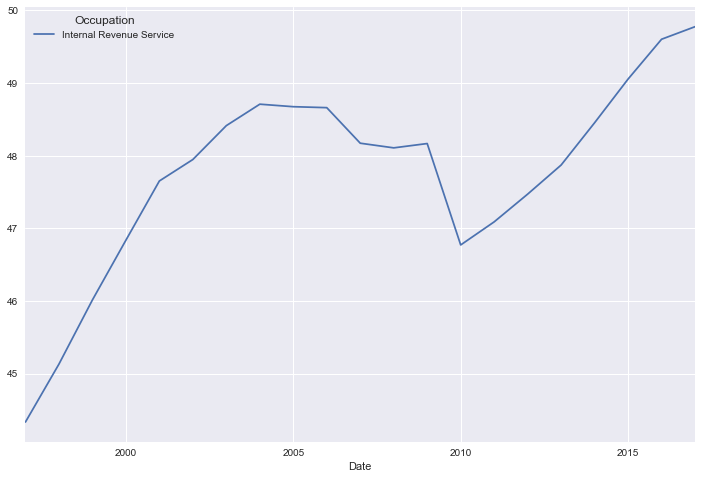

In [11]:
average_ages[average_ages["Date"] > "1997-01-01"]\
.pivot(index="Date", columns="Occupation", values="Average_Age").plot()

In [12]:
IRS = pd.read_csv("IRS_data_summary.csv", thousands=",").rename(columns={"Audit Year": "Year"})
IRS.set_index("Year", inplace=True)
IRS.sort_index(inplace=True)
IRS["Exam coverage"] = (IRS["Individual returns examined (total)"] / IRS["Individual returns filed"])
IRS["Corporate exam coverage"] = (IRS["Corporate returns examined (total)"] / IRS["Corporate returns filed"])

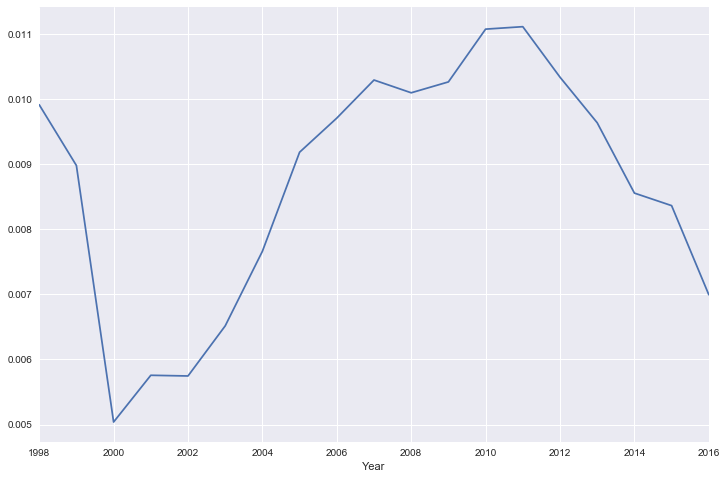

In [13]:
IRS["Exam coverage"].reset_index().to_csv("IRS_metric_coverage.csv", header=["Year", "Exam_Coverage"], index=False)
IRS["Recommended additional tax (total)"].reset_index().to_csv("IRS_metric_recommended.csv", 
                                                               header=["Year", "Recommended_Additional_Tax"], index=False)
IRS["Exam coverage"].plot()

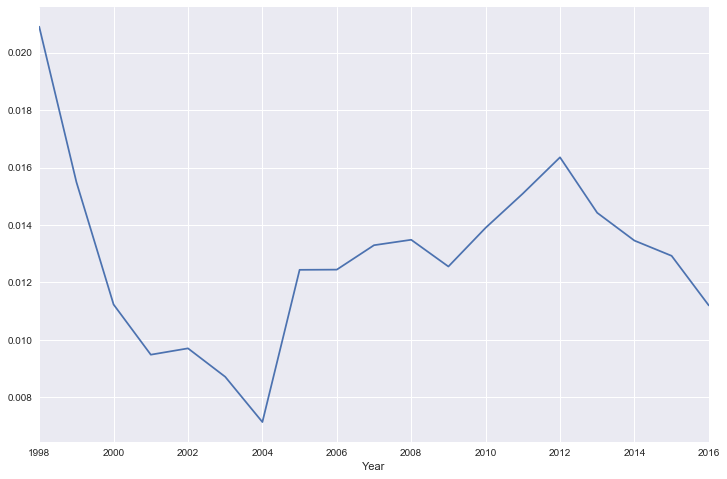

In [14]:
IRS["Corporate exam coverage"].plot()

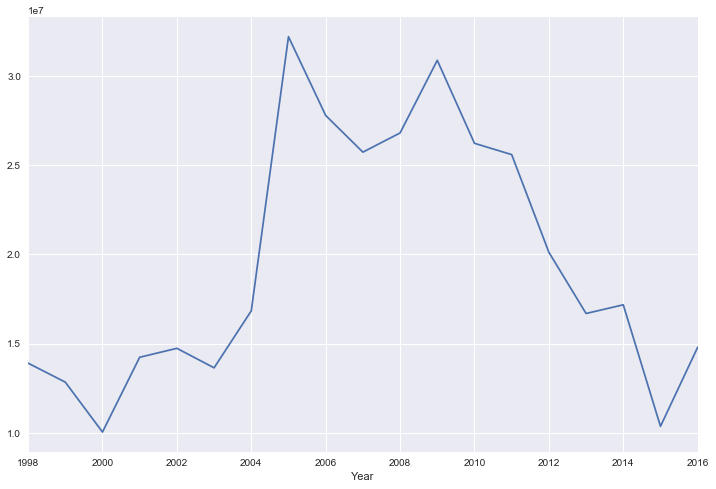

In [15]:
IRS["Recommended additional corporate tax (total)"].plot()

In [16]:
num_ages = pd.read_sql_query("""
SELECT 
    File_Date AS Date, 
    Occupation,
    Age_Range,
    COUNT(*) AS Number_Employees
FROM 
    (SELECT
        File_Date,
        REPLACE(Occupation, '1169', '0512') AS Occupation,
        Age_Range
     FROM 
         data) sub
WHERE
    File_Date LIKE '%03'
    AND Occupation IN ('0512')
GROUP BY
    File_Date, 
    Occupation,
    Age_Range
;""", conn)
num_ages["Date"] = pd.to_datetime(num_ages["Date"], format="%Y%m")
num_ages["Occupation"] = num_ages["Occupation"].map({"0512": "Internal Revenue Service"})

In [17]:
IRS_num_ages = num_ages[num_ages["Occupation"] == "Internal Revenue Service"]\
    .pivot(index="Date", columns="Age_Range", values="Number_Employees").replace(np.nan, 0)
IRS_num_ages["<30"] = IRS_num_ages.iloc[:, 0:3].sum(axis=1)
IRS_num_ages["30-49"] = IRS_num_ages.iloc[:, 3:7].sum(axis=1)
IRS_num_ages["50+"] = IRS_num_ages.iloc[:, 7:11].sum(axis=1)

Fit a linear model to the IRS head count and coverage data

Coefficient:	 2.89852694791e-07
Intercept:	 0.00334355562885
Mean squared error: 0.00
Variance score: 0.08


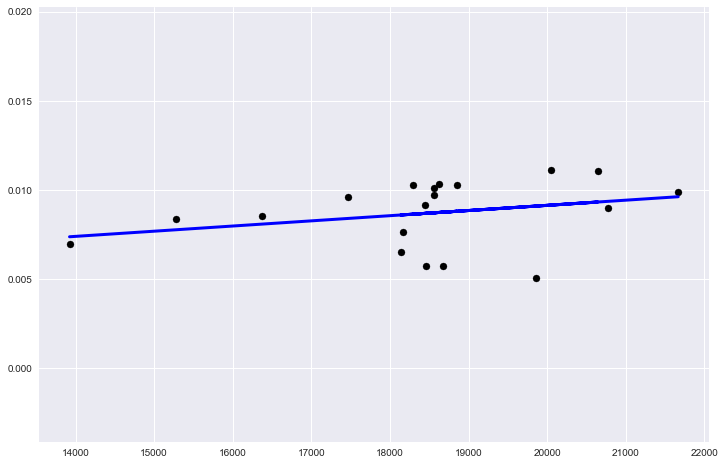

In [58]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Fit IRS employee count and exam coverage
X = num_employees[(num_employees["Date"] > "1998-01-01") & (num_employees["Date"] < "2017-01-01")]["Number_Employees"].as_matrix().reshape(-1, 1)
y = IRS["Exam coverage"].as_matrix()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_predicted = regr.predict(X)

# The coefficients
print('Coefficient:\t', regr.coef_[0])
print('Intercept:\t', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_predicted))

# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, y_predicted, color='blue', linewidth=3)

Fit a linear model to the IRS head count and additional tax data

Coefficient:	 -434.355447145
Intercept:	 18245628.4276
Mean squared error: 20570673642113.34
Variance score: 0.03


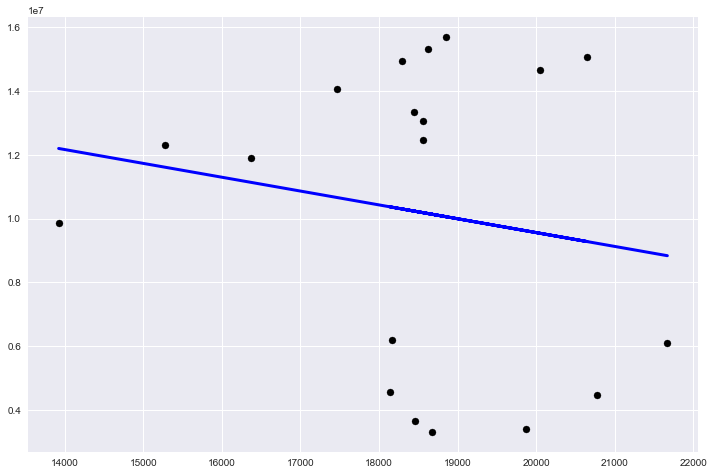

In [59]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Fit IRS employee count and exam coverage
X = num_employees[(num_employees["Date"] > "1998-01-01") & (num_employees["Date"] < "2017-01-01")]["Number_Employees"].as_matrix().reshape(-1, 1)
y = IRS["Recommended additional tax (total)"].as_matrix()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_predicted = regr.predict(X)

# The coefficients
print('Coefficient:\t', regr.coef_[0])
print('Intercept:\t', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_predicted))

# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, y_predicted, color='blue', linewidth=3)

In [60]:
num_employees[(num_employees["Date"] > "1998-01-01") & (num_employees["Date"] < "2017-01-01")]["Number_Employees"]

24    21668
25    20778
26    19864
27    18676
28    18462
29    18135
30    18170
31    18448
32    18557
33    18851
34    18557
35    18293
36    20646
37    20051
38    18626
39    17464
40    16369
41    15274
42    13923
Name: Number_Employees, dtype: int64

In [61]:
IRS["Exam coverage"]

Year
1998    0.009912
1999    0.008978
2000    0.005040
2001    0.005757
2002    0.005747
2003    0.006516
2004    0.007662
2005    0.009183
2006    0.009707
2007    0.010291
2008    0.010095
2009    0.010262
2010    0.011072
2011    0.011110
2012    0.010335
2013    0.009635
2014    0.008555
2015    0.008362
2016    0.006994
Name: Exam coverage, dtype: float64

In [ ]:
IRS["Recommended additional tax (total)"]

In [22]:
# conn.close()